### Analyse FEMA Federal Emergencies and Disasters from 1953 to present

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.startml import *
from Starts.startvis import *
from Starts.startspk import *
%matplotlib inline

local_kwargs {'data_path_1': './data/federal-emergencies-and-disasters-1953-present/database.csv', 'data_path_2': './data/firefighter-fatalities/database.csv', 'data_path_3': '', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
disasters = train_data
firefighters = test_data

In [3]:
disasters.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


In [4]:
# Number of Disasters at every state
disaster_states = disasters['State'].unique()
sta_dis=[(st, len(disasters[disasters['State']==st])) for st in disaster_states]
sta_dis

[('GA', 1406),
 ('TX', 3842),
 ('LA', 1393),
 ('MI', 589),
 ('MT', 393),
 ('MA', 347),
 ('IA', 1471),
 ('NH', 248),
 ('FL', 1512),
 ('AK', 155),
 ('MS', 1277),
 ('CA', 1017),
 ('NV', 138),
 ('SD', 960),
 ('WV', 1063),
 ('RI', 89),
 ('ME', 371),
 ('CT', 193),
 ('NY', 1223),
 ('NM', 336),
 ('NC', 1312),
 ('SC', 520),
 ('IN', 1235),
 ('HI', 64),
 ('CO', 480),
 ('KS', 1261),
 ('OK', 1882),
 ('PA', 1081),
 ('NJ', 517),
 ('OR', 358),
 ('WA', 656),
 ('ID', 210),
 ('OH', 1050),
 ('PR', 1121),
 ('KY', 2026),
 ('VA', 1982),
 ('MO', 2263),
 ('AR', 1282),
 ('IL', 1036),
 ('ND', 1112),
 ('MN', 1190),
 ('NE', 1053),
 ('AL', 1207),
 ('DE', 44),
 ('MD', 393),
 ('GU', 14),
 ('TN', 1208),
 ('FM', 31),
 ('WY', 67),
 ('VT', 250),
 ('VI', 55),
 ('WI', 670),
 ('AS', 55),
 ('AZ', 210),
 ('PW', 6),
 ('MP', 32),
 ('UT', 148),
 ('MH', 61),
 ('DC', 20)]

In [5]:
# Total number of disasters happened
disaster_types = disasters['Disaster Type'].unique()
plt_dis=[(dis, len(disasters[disasters['Disaster Type']==dis])) for dis in disaster_types]
plt_dis

[('Tornado', 1412),
 ('Flood', 9317),
 ('Fire', 2647),
 ('Other', 297),
 ('Earthquake', 105),
 ('Hurricane', 8764),
 ('Volcano', 50),
 ('Storm', 16250),
 ('Chemical', 18),
 ('Typhoon', 119),
 ('Drought', 1292),
 ('Dam/Levee Break', 6),
 ('Snow', 3565),
 ('Ice', 1970),
 ('Winter', 301),
 ('Water', 42),
 ('Mud/Landslide', 10),
 ('Human Cause', 6),
 ('Terrorism', 5),
 ('Tsunami', 9)]

In [6]:
x = [d[0] for d in plt_dis]
y = tuple([d[1] for d in plt_dis])
df = pd.DataFrame.from_records([y], columns=x)
df

,Tornado,Flood,Fire,Other,Earthquake,Hurricane,Volcano,Storm,Chemical,Typhoon,Drought,Dam/Levee Break,Snow,Ice,Winter,Water,Mud/Landslide,Human Cause,Terrorism,Tsunami
0,1412,9317,2647,297,105,8764,50,16250,18,119,1292,6,3565,1970,301,42,10,6,5,9


In [7]:
# The disaster with the most occurrences
df.idxmax(axis=1), df['Storm'].values

(0    Storm
 dtype: object, array([16250]))

In [8]:
# The disaster with the least occurrences
df.idxmin(axis=1), df['Terrorism'].values

(0    Terrorism
 dtype: object, array([5]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

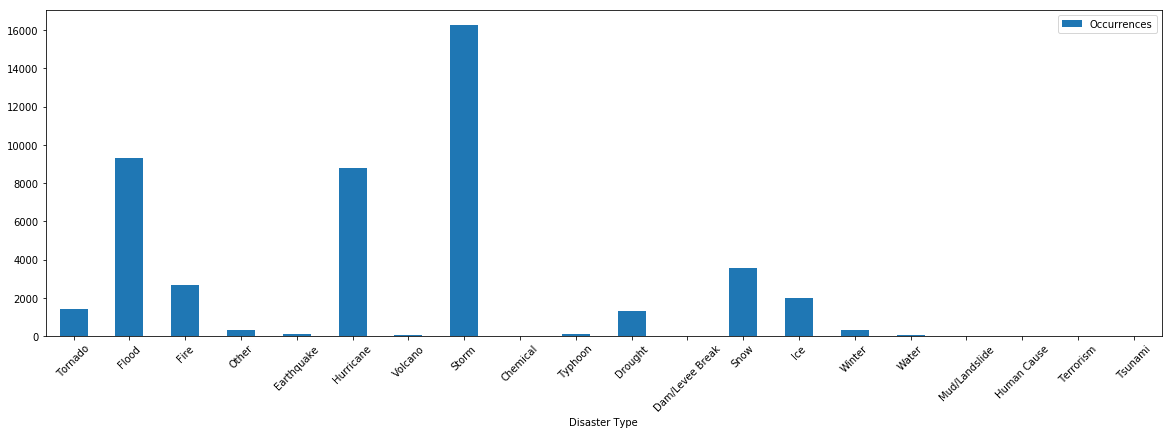

In [9]:
# Visual all disasters
df2 = pd.DataFrame(data=plt_dis, columns=['Disaster Type', 'Occurrences'])
df2.plot(x='Disaster Type', y='Occurrences', figsize=(20,6), kind='bar')
plt.xticks(rotation=45)

In [10]:
x = [d[0] for d in sta_dis]
y = tuple([d[1] for d in sta_dis])
df3 = pd.DataFrame.from_records([y], columns=x)
df3

,GA,TX,LA,MI,MT,MA,IA,NH,FL,AK,...,VT,VI,WI,AS,AZ,PW,MP,UT,MH,DC
0,1406,3842,1393,589,393,347,1471,248,1512,155,...,250,55,670,55,210,6,32,148,61,20


In [11]:
# The State with the most occurrences
df3.idxmax(axis=1), df3['TX'].values

(0    TX
 dtype: object, array([3842]))

In [12]:
# The State with the most occurrences
df3.idxmin(axis=1), df3['PW'].values

(0    PW
 dtype: object, array([6]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

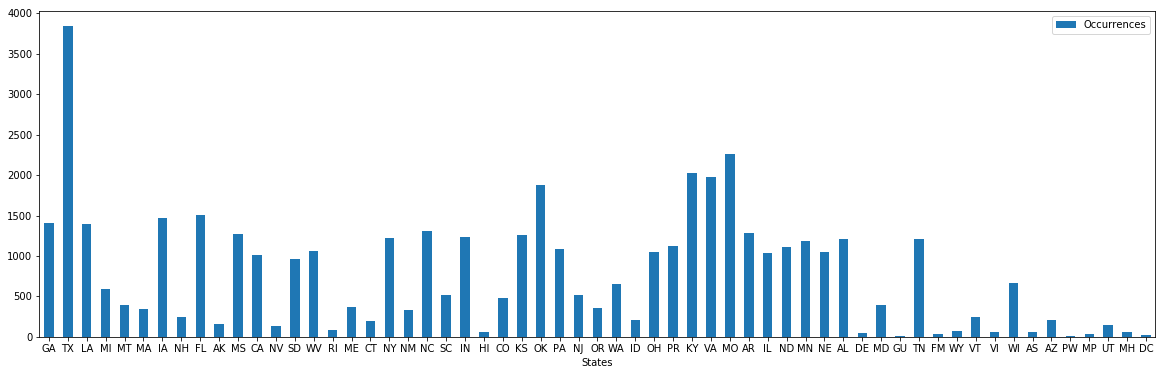

In [15]:
# Visual all disasters
df4 = pd.DataFrame(data=sta_dis, columns=['States', 'Occurrences'])
df4.plot(x='States', y='Occurrences', figsize=(20,6), kind='bar')
plt.xticks(rotation=0)